In [ ]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
#enable inline plotting
%matplotlib inline
import numpy as np
import requests
import seaborn as sns

In [ ]:
import pandas as pd

# Use the raw file URL
file_path = "https://raw.githubusercontent.com/Dinarauz/Netflix/main/Dim_User.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")

print(df.head())



   User ID  Gender      Device         Country  FamilyMember  Age  \
0        1    Male  Smartphone   United States             5   21   
1        2  Female      Tablet          Canada             5   17   
2        3    Male    Smart TV  United Kingdom             3   22   
3        4  Female      Laptop       Australia             4   24   
4        5    Male  Smartphone         Germany             2   23   

   TimeConsumingPerWeek               Genre         Satisfaction  \
0                     9              Horror            Satisfied   
1                     7              Comedy  Extremely satisfied   
2                     8  Action & Adventure              Neutral   
3                     8              Horror  Extremely satisfied   
4                     9  Action & Adventure  Extremely satisfied   

   MontlyIncomeUSD  
0              900  
1              700  
2              800  
3              600  
4             1000  


In [ ]:
# Use the raw file URL
file_path2 = "https://raw.githubusercontent.com/Dinarauz/Netflix/main/Fact_Netflix_Usage.xlsx"
df2 = pd.read_excel(file_path2, engine="openpyxl")

print(df2.head())

   User ID  Join Date Last Payment Date  SubscriptionID  Monthly Revenue
0        1 2022-01-15        2023-06-10               1               10
1        2 2021-09-05        2023-06-22               3               15
2        3 2023-02-28        2023-06-27               2               12
3        4 2022-07-10        2023-06-26               2               12
4        5 2023-05-01        2023-06-28               1               10


In [ ]:
# Merge
df1=pd.merge(df, df2, on='User ID', how = 'outer')
df1


,User ID,Gender,Device,Country,FamilyMember,Age,TimeConsumingPerWeek,Genre,Satisfaction,MontlyIncomeUSD,Join Date,Last Payment Date,SubscriptionID,Monthly Revenue
0,1,Male,Smartphone,United States,5,21,9,Horror,Satisfied,900,2022-01-15,2023-06-10,1,10
1,2,Female,Tablet,Canada,5,17,7,Comedy,Extremely satisfied,700,2021-09-05,2023-06-22,3,15
2,3,Male,Smart TV,United Kingdom,3,22,8,Action & Adventure,Neutral,800,2023-02-28,2023-06-27,2,12
3,4,Female,Laptop,Australia,4,24,8,Horror,Extremely satisfied,600,2022-07-10,2023-06-26,2,12
4,5,Male,Smartphone,Germany,2,23,9,Action & Adventure,Extremely satisfied,1000,2023-05-01,2023-06-28,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,820,Female,Tablet,United States,1,67,2,Comedy,Neutral,3500,2022-07-07,2023-06-30,1,11
820,821,Female,Laptop,United States,1,50,1,Others,Extremely satisfied,3900,2022-07-13,2023-06-29,1,12
821,822,Male,Laptop,Canada,4,46,1,Action & Adventure,Satisfied,3600,2022-07-24,2023-06-29,1,11
822,823,Male,Smartphone,United Kingdom,1,62,2,Horror,Dissatisfied,3400,2022-07-29,2023-06-30,2,15


In [ ]:
file_path3='/content/Dim_Subscription.xlsx'
df3=pd.read_excel(file_path3)
df3

,SubscriptionID,SubscriptionMethod,MonthlyFeeUSD,NoDevice,PlanDurationMonth
0,1,Basic,10,1,1
1,2,Standard,12,2,1
2,3,Premium,15,4,1


In [ ]:
# Merge Subscription ID
df2 = pd.merge(df1, df3, on='SubscriptionID', how='outer')
df2

# Combine 'User ID_x' and 'User ID_y' into one column
#df2['User ID'] = df2['User ID_x'].combine_first(df2['User ID_y'])
#df2['Join Date'] = df2['Join Date_x'].combine_first(df2['Join Date_y'])
#df2['Last Payment Date'] = df2['Last Payment Date_x'].combine_first(df2['Last Payment Date_y'])
#df2['Monthly Revenue'] = df2['Monthly Revenue_x'].combine_first(df2['Monthly Revenue_y'])

# Drop the old columns
#df2 = df2.drop(columns=['User ID_x', 'User ID_y'])
#df2 = df2.drop(columns=['Join Date_x', 'Join Date_y'])
#df2 = df2.drop(columns=['Last Payment Date_x', 'Last Payment Date_y'])
#df2 = df2.drop(columns=['Monthly Revenue_x', 'Monthly Revenue_y'])

df2

,User ID,Gender,Device,Country,FamilyMember,Age,TimeConsumingPerWeek,Genre,Satisfaction,MontlyIncomeUSD,Join Date,Last Payment Date,SubscriptionID,Monthly Revenue,SubscriptionMethod,MonthlyFeeUSD,NoDevice,PlanDurationMonth
0,1,Male,Smartphone,United States,5,21,9,Horror,Satisfied,900,2022-01-15,2023-06-10,1,10,Basic,10,1,1
1,5,Male,Smartphone,Germany,2,23,9,Action & Adventure,Extremely satisfied,1000,2023-05-01,2023-06-28,1,10,Basic,10,1,1
2,8,Female,Laptop,Mexico,1,21,9,Horror,Satisfied,700,2023-04-02,2023-06-24,1,10,Basic,10,1,1
3,11,Female,Smartphone,United States,3,19,10,Comedy,Satisfied,1000,2022-05-16,2023-06-22,1,10,Basic,10,1,1
4,14,Male,Smartphone,Australia,1,20,10,Horror,Extremely satisfied,1000,2022-08-01,2023-06-26,1,10,Basic,10,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,809,Male,Smartphone,Australia,2,58,3,Others,Neutral,3400,2022-06-22,2023-06-28,3,10,Premium,15,4,1
820,811,Male,Laptop,France,1,60,2,Comedy,Dissatisfied,3600,2022-06-10,2023-06-30,3,13,Premium,15,4,1
821,816,Female,Smart TV,Spain,3,67,3,Others,Dissatisfied,3500,2022-06-18,2023-06-30,3,15,Premium,15,4,1
822,819,Male,Laptop,Canada,2,59,2,Horror,Neutral,3500,2022-07-01,2023-07-01,3,14,Premium,15,4,1


In [ ]:
# Checking for a null values
null_summary = df2.isna().sum()
print(null_summary)

User ID                 0
Gender                  0
Device                  0
Country                 0
FamilyMember            0
Age                     0
TimeConsumingPerWeek    0
Genre                   0
Satisfaction            0
MontlyIncomeUSD         0
Join Date               0
Last Payment Date       0
SubscriptionID          0
Monthly Revenue         0
SubscriptionMethod      0
MonthlyFeeUSD           0
NoDevice                0
PlanDurationMonth       0
dtype: int64


In [ ]:
df2 = df2.rename(columns={'User ID': 'User_ID', 'FamilyMember': 'Family_Member', 'TimeConsumingPerWeek': 'Time_Consuming_Per_Week', 'MontlyIncomeUSD': 'Monthly_Income',
                          'Join Date': 'Join_Date', 'Last Payment Date': 'Last_Payment_Date', 'SubscriptionID': 'Subscription_ID', 'SubscriptionMethod': 'Subscription_Method',
                          'Monthly Revenue': 'Monthly_Revenue', 'MonthlyFeeUSD': 'Monthly_Fee', 'NoDevice': 'No_Device', 'PlanDurationMonth': 'Plan_Duration_Month'
                          })

In [ ]:
df2.describe

<bound method NDFrame.describe of      User_ID  Gender      Device        Country  Family_Member  Age  \
0          1    Male  Smartphone  United States              5   21   
1          5    Male  Smartphone        Germany              2   23   
2          8  Female      Laptop         Mexico              1   21   
3         11  Female  Smartphone  United States              3   19   
4         14    Male  Smartphone      Australia              1   20   
..       ...     ...         ...            ...            ...  ...   
819      809    Male  Smartphone      Australia              2   58   
820      811    Male      Laptop         France              1   60   
821      816  Female    Smart TV          Spain              3   67   
822      819    Male      Laptop         Canada              2   59   
823      824  Female  Smartphone      Australia              1   56   

     Time_Consuming_Per_Week               Genre         Satisfaction  \
0                          9              Horror            Satisfied   
1                          9  Action & Adventure  Extremely satisfied   
2                          9              Horror            Satisfied   
3                         10              Comedy            Satisfied   
4                         10              Horror  Extremely satisfied   
..                       ...                 ...                  ...   
819                        3              Others              Neutral   
820                        2              Comedy         Dissatisfied   
821                        3              Others         Dissatisfied   
822                        2              Horror              Neutral   
823                        1              Horror              Neutral   

     Monthly_Income  Join_Date Last_Payment_Date  Subscription_ID  \
0               900 2022-01-15        2023-06-10                1   
1              1000 2023-05-01        2023-06-28                1   
2               700 2023-04-02        2023-06-24                1   
3              1000 2022-05-16        2023-06-22                1   
4              1000 2022-08-01        2023-06-26                1   
..              ...        ...               ...              ...   
819            3400 2022-06-22        2023-06-28                3   
820            3600 2022-06-10        2023-06-30                3   
821            3500 2022-06-18        2023-06-30                3   
822            3500 2022-07-01        2023-07-01                3   
823            4200 2022-07-31        2023-06-30                3   

     Monthly_Revenue Subscription_Method  Monthly_Fee  No_Device  \
0                 10               Basic           10          1   
1                 10               Basic           10          1   
2                 10               Basic           10          1   
3                 10               Basic           10          1   
4                 10               Basic           10          1   
..               ...                 ...          ...        ...   
819               10             Premium           15          4   
820               13             Premium           15          4   
821               15             Premium           15          4   
822               14             Premium           15          4   
823               13             Premium           15          4   

     Plan_Duration_Month  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1  
..                   ...  
819                    1  
820                    1  
821                    1  
822                    1  
823                    1  

[824 rows x 18 columns]>

In [ ]:
df2.shape
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   User_ID                  824 non-null    int64         
 1   Gender                   824 non-null    object        
 2   Device                   824 non-null    object        
 3   Country                  824 non-null    object        
 4   Family_Member            824 non-null    int64         
 5   Age                      824 non-null    int64         
 6   Time_Consuming_Per_Week  824 non-null    int64         
 7   Genre                    824 non-null    object        
 8   Satisfaction             824 non-null    object        
 9   Monthly_Income           824 non-null    int64         
 10  Join_Date                824 non-null    datetime64[ns]
 11  Last_Payment_Date        824 non-null    datetime64[ns]
 12  Subscription_ID          824 non-nul

In [ ]:
sns.set_style("darkgrid")
sns.set_palette("viridis")

# **Which country has the highest number of subscriptions by method?**

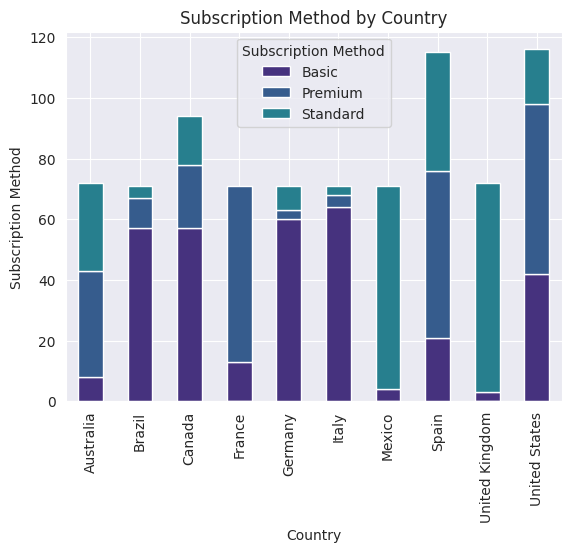

In [ ]:
df2.groupby('Country')['Subscription_Method'].value_counts()
df2.groupby('Country')['Subscription_Method'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Country')
plt.ylabel('Subscription Method')
plt.title('Subscription Method by Country')
plt.legend(title='Subscription Method')
plt.show()

# **Which genre is most watched by gender ?**

In [ ]:
sns.set_style("darkgrid")
sns.set_palette("muted")

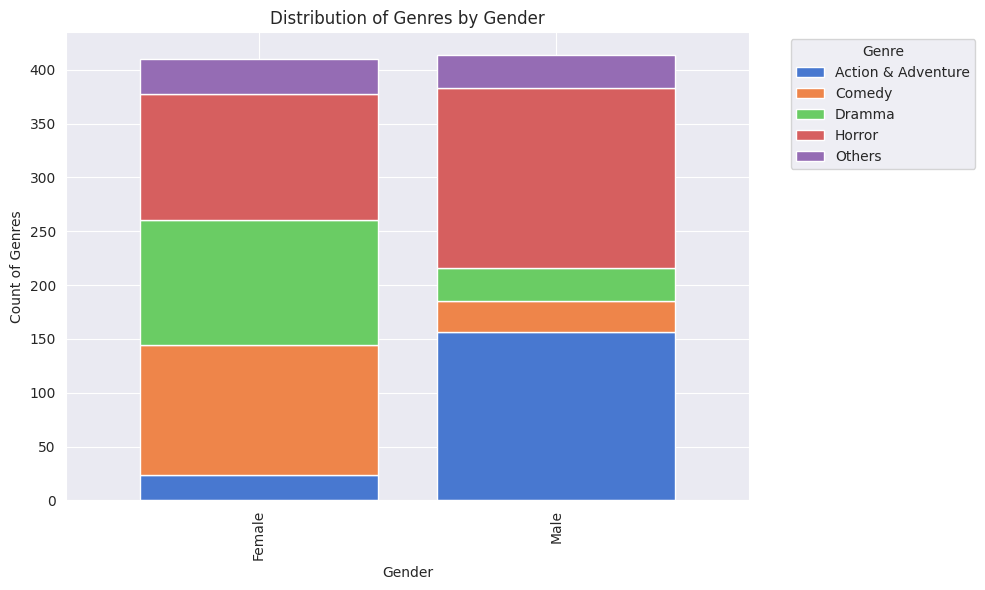

In [ ]:
# Prepare the data for stacked bar chart
stacked_data = df2.groupby(['Gender', 'Genre']).size().unstack()

# Plot the stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count of Genres')
plt.title('Distribution of Genres by Gender')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()
plt.show()


**Which genre is most popular by Country**

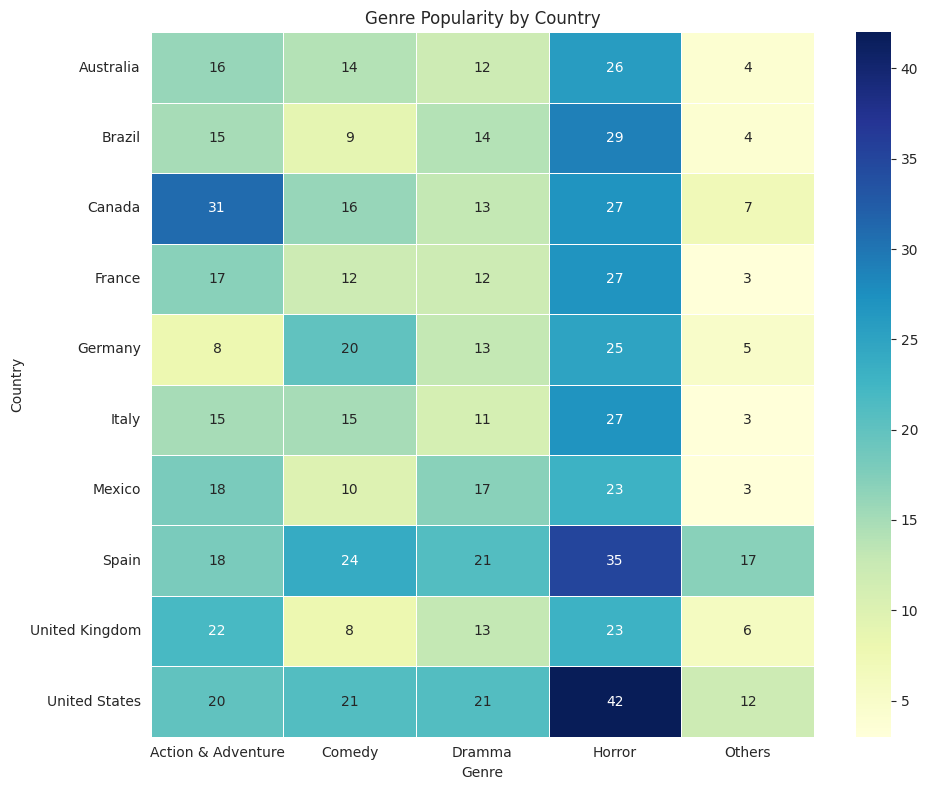

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
heatmap_data = df2.groupby(['Country', 'Genre']).size().unstack()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Genre Popularity by Country')
plt.xlabel('Genre')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


# **Does monthly income affect the choice of subscription method and plan?**

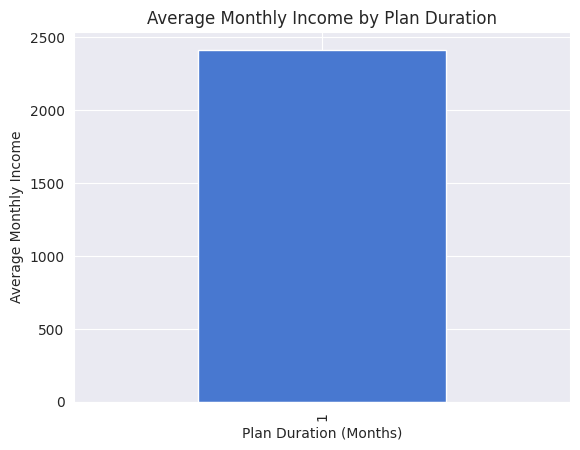

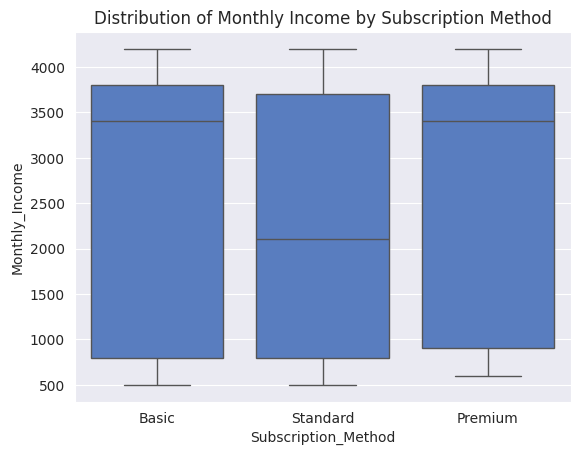

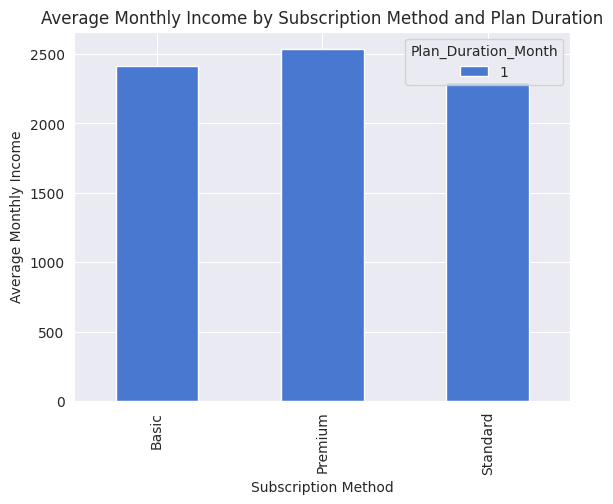

In [ ]:
df2.groupby('Plan_Duration_Month')['Monthly_Income'].mean().plot(kind='bar')
plt.xlabel('Plan Duration (Months)')
plt.ylabel('Average Monthly Income')
plt.title('Average Monthly Income by Plan Duration')
plt.show()


sns.boxplot(x='Subscription_Method', y='Monthly_Income', data=df2)
plt.title('Distribution of Monthly Income by Subscription Method')
plt.show()

df2.groupby(['Subscription_Method', 'Plan_Duration_Month'])['Monthly_Income'].mean().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Subscription Method')
plt.ylabel('Average Monthly Income')
plt.title('Average Monthly Income by Subscription Method and Plan Duration')
plt.show()


What percentage of users renew their subscriptions after their initial plan duration ends?

In [ ]:
df2['Join_Date'] = pd.to_datetime(df2['Join_Date'])
df2['Last_Payment_Date'] = pd.to_datetime(df2['Last_Payment_Date'])

# calcualte the initial plan end date
df2['Initial_Plan_End_Date'] = df2['Join_Date'] + pd.to_timedelta(df2['Plan_Duration_Month'] * 30, unit='D')

# Checking the user renewed their subscription
df2['Renewed'] = df2['Last_Payment_Date'] > df2['Initial_Plan_End_Date']

# the renewal rate
renewed_count = df2['Renewed'].sum()
total_users = len(df2)
renewal_rate = (renewed_count / total_users) * 100

# print
print(f"Total Users: {total_users}")
print(f"Users Who Renewed: {renewed_count}")
print(f"Renewal Rate: {renewal_rate:.2f}%")


Total Users: 824
Users Who Renewed: 820
Renewal Rate: 99.51%


# **What is the retention rate based on join dates and last payment dates?**

In [ ]:
# Retention intervals (0-30 days, 31-60 days, 60-90, 90-180, 180-365)
bins = [0, 30, 60, 90, 180, 365, df2['Days_Since_Join'].max()]
labels = ['0-30 days', '31-60 days', '61-90 days', '91-180 days', '181-365 days', '>365 days']
df2['Retention_Period'] = pd.cut(df2['Days_Since_Join'], bins=bins, labels=labels)

# Calculating retention rates
retention_counts = df2['Retention_Period'].value_counts(normalize=True) * 100
print("Retention Rates (%):")
print(retention_counts)


Retention Rates (%):
Retention_Period
181-365 days    67.961165
>365 days       27.184466
91-180 days      3.276699
61-90 days       0.606796
0-30 days        0.485437
31-60 days       0.485437
Name: proportion, dtype: float64


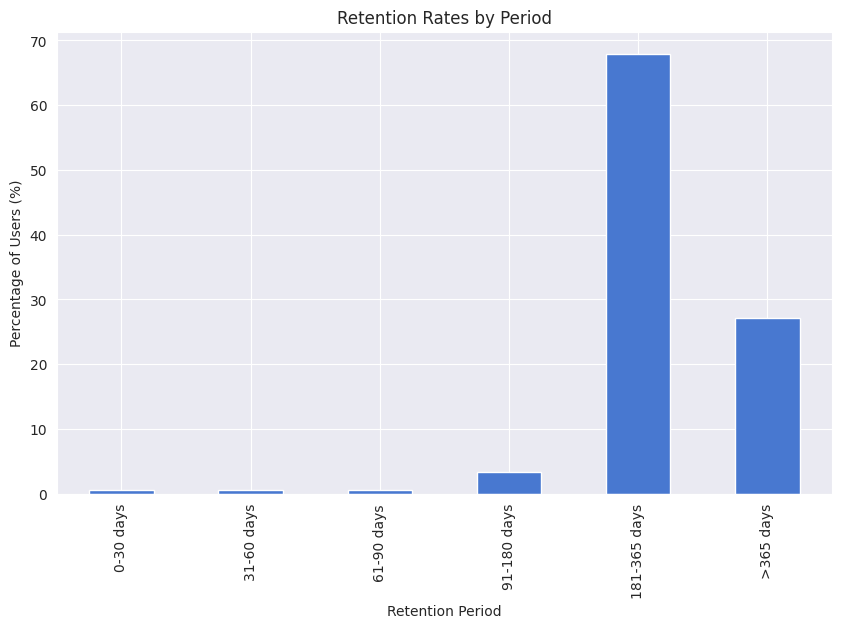

In [ ]:
retention_counts.sort_index().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Retention Period')
plt.ylabel('Percentage of Users (%)')
plt.title('Retention Rates by Period')
plt.show()


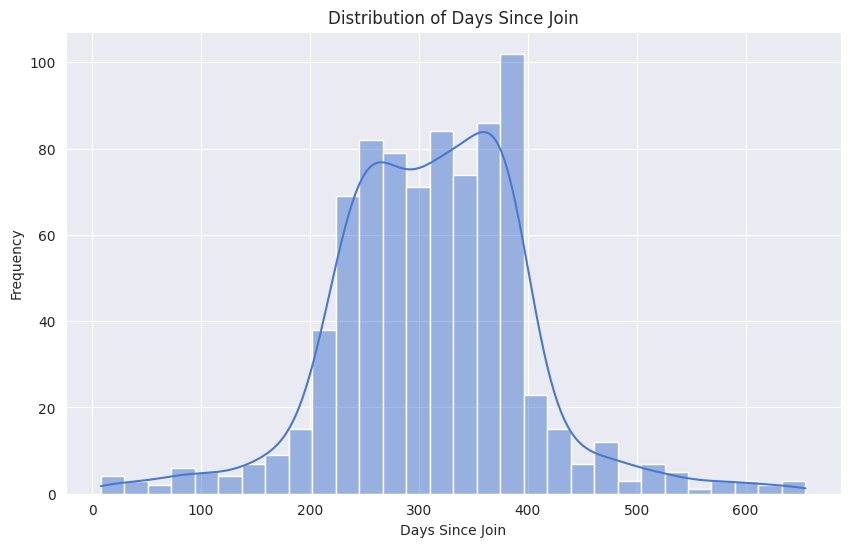

In [ ]:
df2['Join_Date'] = pd.to_datetime(df2['Join_Date'])
df2['Last_Payment_Date'] = pd.to_datetime(df2['Last_Payment_Date'])
df2['Days_Since_Join'] = (df2['Last_Payment_Date'] - df2['Join_Date']).dt.days
plt.figure(figsize=(10, 6))
sns.histplot(df2['Days_Since_Join'], bins=30, kde=True)
plt.xlabel('Days Since Join')
plt.ylabel('Frequency')
plt.title('Distribution of Days Since Join')
plt.show()

**Is there a seasonal trend in user join dates or subscription renewals?**

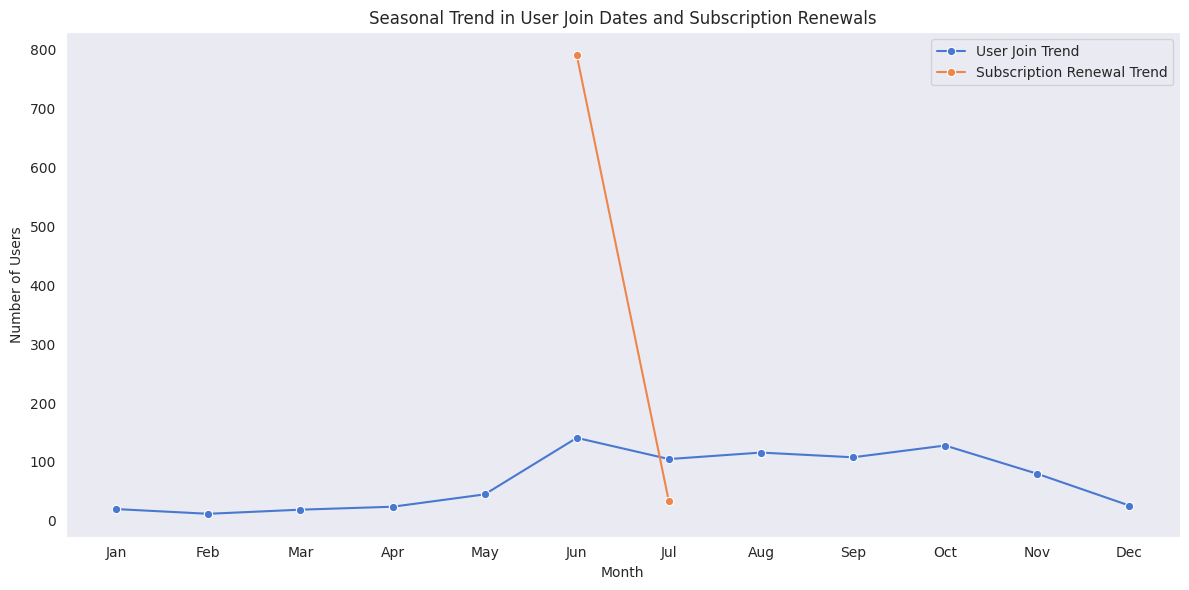

In [ ]:
df2['Join_Date'] = pd.to_datetime(df2['Join_Date'])
df2['Last_Payment_Date'] = pd.to_datetime(df2['Last_Payment_Date'])

# Extract month and year for seasonal analysis
df2['Join_Month'] = df2['Join_Date'].dt.month
df2['Join_Year'] = df2['Join_Date'].dt.year
df2['Renewal_Month'] = df2['Last_Payment_Date'].dt.month
df2['Renewal_Year'] = df2['Last_Payment_Date'].dt.year

# Group by month to count join dates
join_trend = df2.groupby('Join_Month').size()
renewal_trend = df2.groupby('Renewal_Month').size()

# Plot seasonal trends
plt.figure(figsize=(12, 6))

# Plot Join Trend
sns.lineplot(x=join_trend.index, y=join_trend.values, label='User Join Trend', marker='o')

# Plot Renewal Trend
sns.lineplot(x=renewal_trend.index, y=renewal_trend.values, label='Subscription Renewal Trend', marker='o')

# Add labels and title
plt.title('Seasonal Trend in User Join Dates and Subscription Renewals')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.xticks(range(1, 13),
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

